In [31]:
# to handle dataset
import pandas as pd
import numpy as np
from collections import Counter

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# to make plots
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# to ignore warning
import warnings

In [32]:
# Reading dataset from Stackoverflow survey data

df_2021 = pd.read_csv('survey_results_public_2021.csv')
df_2020 = pd.read_csv('survey_results_public_2020.csv')
df_2019 = pd.read_csv('survey_results_public_2019.csv')
df_2018 = pd.read_csv('survey_results_public_2018.csv')
df_2017 = pd.read_csv('survey_results_public_2017.csv')

C:\Users\Ahmad Gilang A\AppData\Local\Temp\ipykernel_2988\2071964316.py:6: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2018 = pd.read_csv('survey_results_public_2018.csv')


In [33]:
# sample data 2021
df_2021.head(5)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,Na

# 1. What database management software is often used to work between MySQL and PostgreSQL in Indonesia

In [34]:
# Filter a dataframe by country and returns filtered dataframe

def filter_country(data, col_filter, country, columns):
    
    df = data    
    for column in columns: 
        df = df[df[col_filter] == country].dropna(subset=[column])
        
    return df

# Filter the dataframe by Indonesia and selecting some columns.
df_21 = filter_country(df_2021, 'Country', 'Indonesia', ['DatabaseHaveWorkedWith'])
df_20 = filter_country(df_2020, 'Country', 'Indonesia', ['DatabaseWorkedWith'])
df_19 = filter_country(df_2019, 'Country', 'Indonesia', ['DatabaseWorkedWith'])
df_18 = filter_country(df_2018, 'Country', 'Indonesia', ['DatabaseWorkedWith'])
df_17 = filter_country(df_2017, 'Country', 'Indonesia', ['HaveWorkedDatabase'])

In [35]:
#Split column by (;) and returns a splited series

def split_column(data, column):
    
    df = data
    col_series = df[column].apply(lambda x: x.split(';'))
    
    return col_series

# Splitting the Data Frame by column into a Series. 
data_21 = split_column(df_21, 'DatabaseHaveWorkedWith')
data_20 = split_column(df_20, 'DatabaseWorkedWith')
data_19 = split_column(df_19, 'DatabaseWorkedWith')
data_18 = split_column(df_18, 'DatabaseWorkedWith')
data_17 = split_column(df_17, 'HaveWorkedDatabase')

In [36]:
# Flat a nested list and returns a flat list

def disarray(array_list):
    
    objects = []
    
    for row in array_list:
        for obj in row:
            objects.append(obj.strip())
            
    return objects

# Flatting nested list objects.
list_2021 = disarray(data_21)
list_2020 = disarray(data_20)
list_2019 = disarray(data_19)
list_2018 = disarray(data_18)
list_2017 = disarray(data_17)

In [37]:
# Group by count to a list and returns a result dict

def group_list(data_list, year):
    
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Database Platform':key, 'Count': value, 'Year': year} for key, value in grouped_list.items()]
    
    return grouped_dict

# Groping a list and creating a dict.
dict_2021 = group_list(list_2021, '2021')
dict_2020 = group_list(list_2020, '2020')
dict_2019 = group_list(list_2019, '2019')
dict_2018 = group_list(list_2018, '2018')
dict_2017 = group_list(list_2017, '2017')

In [38]:
# Choose data MySQL and PostgreSQL 

PGSQL_21 = dict_2021[5]
MYSQL_21 = dict_2021[3]

PGSQL_20 = dict_2020[0]
MYSQL_20 = dict_2020[1]

PGSQL_19 = dict_2019[11]
MYSQL_19 = dict_2019[1]

PGSQL_18 = dict_2018[3]
MYSQL_18 = dict_2018[2]

PGSQL_17 = dict_2017[2]
MYSQL_17 = dict_2017[1]

In [39]:
# Create a dataframe

df_PGSQL_21 = pd.DataFrame((PGSQL_21), index=[0])
df_MYSQL_21 = pd.DataFrame((MYSQL_21), index=[0])

df_PGSQL_20 = pd.DataFrame((PGSQL_20), index=[0])
df_MYSQL_20 = pd.DataFrame((MYSQL_20), index=[0])

df_PGSQL_19 = pd.DataFrame((PGSQL_19), index=[0])
df_MYSQL_19 = pd.DataFrame((MYSQL_19), index=[0])

df_PGSQL_18 = pd.DataFrame((PGSQL_18), index=[0])
df_MYSQL_18 = pd.DataFrame((MYSQL_18), index=[0])

df_PGSQL_17 = pd.DataFrame((PGSQL_17), index=[0])
df_MYSQL_17 = pd.DataFrame((MYSQL_17), index=[0])

DataFrame = [df_PGSQL_21, df_MYSQL_21, df_PGSQL_20, df_MYSQL_20, df_PGSQL_19, df_MYSQL_19, df_PGSQL_18, df_MYSQL_18, df_PGSQL_17, df_MYSQL_17] 
result = pd.concat(DataFrame).drop_duplicates().reset_index(drop=True)
result

,Database Platform,Count,Year
0,PostgreSQL,250,2021
1,MySQL,411,2021
2,PostgreSQL,155,2020
3,MySQL,300,2020
4,PostgreSQL,166,2019
5,MySQL,363,2019
6,PostgreSQL,136,2018
7,MySQL,349,2018
8,PostgreSQL,44,2017
9,MySQL,124,2017


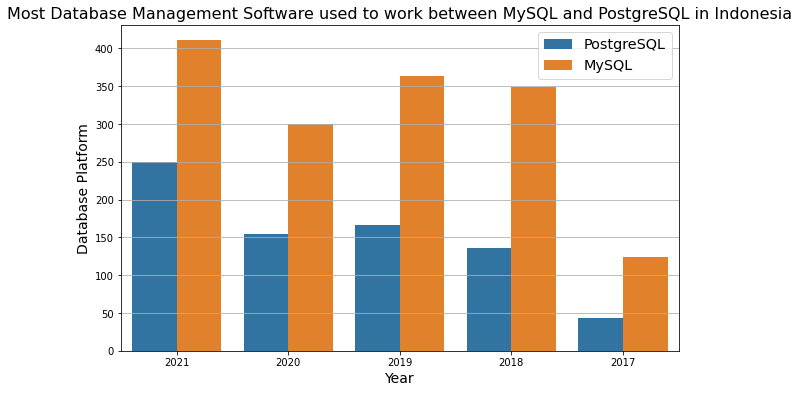

In [40]:
# Create Figure.1 MySQL and PostgreSQL

plt.figure(figsize=(10,6))
sb.barplot(x = 'Year',
            y = 'Count',
            hue = 'Database Platform',
            data = result)

plt.xlabel("Year", fontsize = 14)
plt.ylabel("Database Platform", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='40')
plt.title('Most Database Management Software used to work between MySQL and PostgreSQL in Indonesia', size = 16)
plt.grid(axis='y')
plt.show()

# 2. How percentage is the comparasion between MySQL and PostgreSQL as a database management software

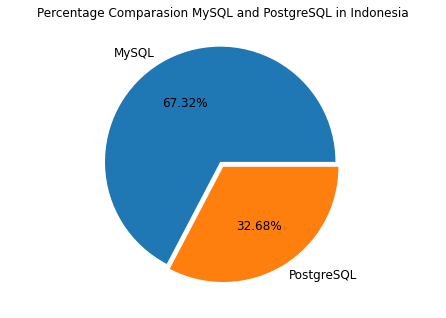

In [41]:
# Grouping dataframe
df = result.groupby(['Database Platform']).sum()

# Create a list from dataframe
Database_Platform = ('MySQL','PostgreSQL')
Amount = (1547, 751)

# Create Figure.1 MySQL and PostgreSQL
fig = plt.figure()
expl = [0.05,0]
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.set_title('Percentage Comparasion MySQL and PostgreSQL in Indonesia')
ax.pie(Amount, labels = Database_Platform, autopct='%1.2f%%', explode = expl, textprops ={'fontsize' : 12})
plt.show()

# 3. What is MySQL the most widely used database manajement software in Indonesia

In [42]:
# Create a dataframe

df_2021 = pd.DataFrame(dict_2021)
df_2020 = pd.DataFrame(dict_2020)
df_2019 = pd.DataFrame(dict_2019)
df_2018 = pd.DataFrame(dict_2018)
df_2017 = pd.DataFrame(dict_2017)

DataFrame = [df_2021, df_2020, df_2019, df_2018, df_2017] 
df_new = pd.concat(DataFrame).drop_duplicates().reset_index(drop=True)

# Take data greater than 100
df_new = df_new.loc[(df_new['Count'] > 100)]

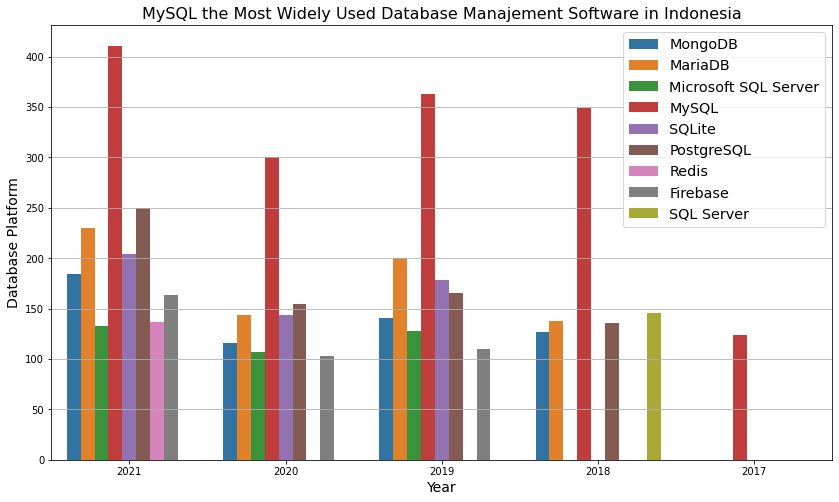

In [43]:
plt.figure(figsize=(14,8))
sb.barplot(x = 'Year',
            y = 'Count',
            hue = 'Database Platform',
            data = df_new)

plt.xlabel("Year", fontsize = 14)
plt.ylabel("Database Platform", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='2', loc = 'upper right')
plt.title('MySQL the Most Widely Used Database Manajement Software in Indonesia', size = 16)
plt.grid(axis='y')
plt.show()